# General Information
>
>Author: Lucas Lobianco De Matheo
>
>Title: **DataPreprocessing - DataSUS - COVID-19**
>
>This dataset was obtained from the SUS website - Brazilian Unified Health System. These are SUS records on COVI-19 in  
> the state of Rio de Janeiro's hospitals.
>
>Extension: .csv
>
>Source: https://dados.gov.br/dataset/casos-nacionais/resource/6aba9396-5d23-43b8-b5dd-6e276c106fd1  
> the link above was dowloaded on 2021-08-15, and may no longer be working.  
> The data obtained is in .csv in the project folder and updates can be obtained from the website:  
> - https://covid.saude.gov.br/  
> - https://dados.gov.br/dataset/notificacao_covid
>
>Date: 15-08-2021
>
> **Main Skills of this project:** 
> - **Data Preparation**
> - **Data Cleansing**  
> - **Data Wrangling**  
> - APIs for Geolocation
> - Data Visualization

# Objective: 
> Clean and structure the data for further analysis

# Importing main Librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data
- The folowing csv file can be found on my github page

In [5]:
df = pd.read_csv(r'data-rj-1.csv', encoding='iso-8859-1', sep=';')
df.shape

(1000000, 31)

In [6]:
df.head()

,ÿid,dataNotificacao,dataNotificacao_res,dataInicioSintomas,dataInicioSintomas_res,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,...,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,LNT8lBEHmQ,2021-03-19T03:00:01.083Z,19/03/2021,2021-03-18T03:00:00.000Z,18/03/2021,undefined,"Dor de Garganta, Dor de Cabeça, Coriza",Não,NaN,NaN,...,RIO DE JANEIRO,33.0,Rio de Janeiro,3304557.0,undefined,undefined,13.0,NaN,NaN,NaN
1,weOCDLS9nn,2021-05-17T03:00:09.638Z,17/05/2021,2021-04-20T03:00:00.000Z,20/04/2021,undefined,Febre,Não,NaN,NaN,...,RIO DE JANEIRO,33.0,Rio de Janeiro,3304557.0,undefined,undefined,53.0,NaN,NaN,NaN
2,7HFnqYpBvd,2020-11-13T03:00:13.383Z,13/11/2020,2020-11-12T03:00:00.000Z,12/11/2020,undefined,"Dor de Garganta, Dispneia, Febre, Tosse, Dor d...",Não,NaN,Imunossupressão,...,RIO DE JANEIRO,33.0,Rio de Janeiro,3304557.0,undefined,undefined,31.0,NaN,NaN,NaN
3,cZkA3B4mkX,2021-05-17T03:00:37.651Z,17/05/2021,2021-05-15T03:00:00.000Z,15/05/2021,undefined,"Febre, Tosse, Dispneia, Dor de Cabeça",Não,7170 - Ajudantes de obras civis,NaN,...,RIO DE JANEIRO,33.0,Petrópolis,3303906.0,undefined,undefined,57.0,NaN,NaN,NaN
4,9hqcZdEiLn,2021-05-17T03:00:37.885Z,17/05/2021,2021-05-11T03:00:00.000Z,11/05/2021,undefined,Assintomático,Não,NaN,NaN,...,RIO DE JANEIRO,33.0,Campos dos Goytacazes,3301009.0,undefined,undefined,32.0,NaN,NaN,NaN


In [7]:
df.columns.values

array(['ÿid', 'dataNotificacao', 'dataNotificacao_res',
       'dataInicioSintomas', 'dataInicioSintomas_res', 'dataNascimento',
       'sintomas', 'profissionalSaude', 'cbo', 'condicoes', 'estadoTeste',
       'dataTeste', 'tipoTeste', 'resultadoTeste', 'paisOrigem', 'sexo',
       'estado', 'estadoIBGE', 'municipio', 'municipioIBGE', 'origem',
       'estadoNotificacao', 'estadoNotificacaoIBGE',
       'municipioNotificacao', 'municipioNotificacaoIBGE', 'excluido',
       'validado', 'idade', 'dataEncerramento', 'evolucaoCaso',
       'classificacaoFinal'], dtype=object)

# Initial remarks about the columns
- Some of the columns may have integrity problems that can be fixed

## ID Column

In [8]:
len(df['ÿid'].unique()) # No duplicatet ID

1000000

In [9]:
df.drop('ÿid', axis=1, inplace=True) # ID Column

## dataNascimento (Birth day) Column

In [10]:
df.dataNascimento.unique()

array(['undefined'], dtype=object)

In [11]:
df.drop('dataNascimento', axis=1, inplace=True) # Birth date - Not informed 

## estadoNotificacao (State of Notification) Column

In [12]:
df.estadoNotificacao.unique()

array(['RIO DE JANEIRO', 'SÃO PAULO', nan, 'RIO GRANDE DO SUL',
       'PERNAMBUCO', 'PARANÁ', 'MINAS GERAIS', 'GOIÁS',
       'RIO GRANDE DO NORTE', 'BAHIA', 'PARAÍBA', 'SANTA CATARINA',
       'AMAZONAS', 'ESPÍRITO SANTO', 'MATO GROSSO DO SUL', 'SERGIPE',
       'PARÁ', 'ALAGOAS', 'CEARÁ', 'DISTRITO FEDERAL', 'MARANHÃO',
       'PIAUÍ', 'MATO GROSSO', 'RONDÔNIA', 'TOCANTINS', 'ACRE', 'RORAIMA',
       'AMAPÁ'], dtype=object)

In [13]:
df.estadoNotificacao.value_counts()

RIO DE JANEIRO         975161
SÃO PAULO                5711
MINAS GERAIS             1346
PARANÁ                   1063
RIO GRANDE DO SUL         540
PERNAMBUCO                424
RIO GRANDE DO NORTE       414
SANTA CATARINA            412
BAHIA                     306
AMAZONAS                  302
CEARÁ                     161
MARANHÃO                  106
DISTRITO FEDERAL          106
ESPÍRITO SANTO            104
SERGIPE                    98
PARAÍBA                    74
GOIÁS                      56
MATO GROSSO DO SUL         49
PARÁ                       46
ALAGOAS                    39
PIAUÍ                      21
ACRE                       15
RONDÔNIA                   14
TOCANTINS                  14
RORAIMA                     8
MATO GROSSO                 7
AMAPÁ                       5
Name: estadoNotificacao, dtype: int64

> These data need to be further investigated.  
> The DataFrame should only contain notifications from **Rio de Janeiro** state  

In [14]:
pd.options.display.max_rows = None
df_state = df[df.estadoNotificacao == 'SÃO PAULO']
df_state[['estadoNotificacao','municipioNotificacao']]

,estadoNotificacao,municipioNotificacao
13,SÃO PAULO,Barueri
54,SÃO PAULO,Barueri
157,SÃO PAULO,São Paulo
205,SÃO PAULO,São Paulo
571,SÃO PAULO,São Paulo
710,SÃO PAULO,Barueri
744,SÃO PAULO,Barueri
1133,SÃO PAULO,São Paulo
1306,SÃO PAULO,São Paulo
1360,SÃO PAULO,São Paulo


In [13]:
df_state = df[df.estadoNotificacao == 'MINAS GERAIS']
df_state[['estadoNotificacao','municipioNotificacao']]

,estadoNotificacao,municipioNotificacao
1157,MINAS GERAIS,Além Paraíba
3734,MINAS GERAIS,São Lourenço
6038,MINAS GERAIS,Além Paraíba
6065,MINAS GERAIS,Belo Horizonte
6105,MINAS GERAIS,Belo Horizonte
6133,MINAS GERAIS,Além Paraíba
6535,MINAS GERAIS,Além Paraíba
6688,MINAS GERAIS,Além Paraíba
7132,MINAS GERAIS,Além Paraíba
7847,MINAS GERAIS,Belo Horizonte


> This data shouldn't be here  
> In fact they are data from other states  
> By personal choice, I will drop the data from other states

In [15]:
pd.options.display.max_rows = 10

In [16]:
df = df[df.estadoNotificacao == 'RIO DE JANEIRO']

In [17]:
df.estadoNotificacao.value_counts()

RIO DE JANEIRO    975161
Name: estadoNotificacao, dtype: int64

>  The new dataSet contains 975,161 rows

### There is a ID for the states (estadoNotificacaoIBGE)

In [18]:
df.estadoNotificacaoIBGE.value_counts() 
# 33 is for Rio de Janeiro, and contains the same amount of rows. 
# therefore the previous operation was successful

33.0    975161
Name: estadoNotificacaoIBGE, dtype: int64

In [19]:
df.drop('estadoNotificacaoIBGE', axis=1, inplace=True) # don't need it
df.drop('estadoNotificacao', axis=1, inplace=True) # nor the state, they are all Rio de Janeiro

In [20]:
df.drop('estado', axis=1, inplace=True) 
df.drop('estadoIBGE', axis=1, inplace=True) 
# both represent state information

In [21]:
df.drop('paisOrigem', axis=1, inplace=True) # Country information - All Brazil (undifined on dataset)

In [22]:
df.drop('municipioIBGE', axis=1, inplace=True) # counties ID
df.drop('municipioNotificacaoIBGE', axis=1, inplace=True) # where in the countie ID it was notified

> The Rio de Janeiro counties remains in the dataset (municipioNotificacao)  
> Where in the countie remains in the dataset (municipioNotificacao)

## origem (origin),  excluido (excluded) and validado (validated) Columns

In [23]:
df.origem.value_counts()

undefined    975161
Name: origem, dtype: int64

In [24]:
df.excluido.value_counts()

undefined    975161
Name: excluido, dtype: int64

In [25]:
df.validado.value_counts()

undefined    975161
Name: validado, dtype: int64

In [26]:
df.drop('origem', axis=1, inplace=True) # origin | no relevant information
df.drop('excluido', axis=1, inplace=True) # excluded | no relevant information
df.drop('validado', axis=1, inplace=True) # validated | no relevant information

## Dates: dataNotificacao (Notification Date),  dataInicioSintomas (onset of symptoms)

In [27]:
df.drop('dataNotificacao', axis=1, inplace=True) # Notification Date - Have a better column (dataNotificacao_res)
df.drop('dataInicioSintomas', axis=1, inplace=True) # onset of symptoms - Have a better column (dataInicioSintomas_res)

In [28]:
df.drop('dataEncerramento', axis=1, inplace=True) # not enough information available

In [29]:
df['dataTeste'].head(15)

0     2021-03-19T03:00:00.000Z
1     2021-04-21T03:00:00.000Z
2     2020-11-13T03:00:00.000Z
3     2021-05-12T03:00:00.000Z
4     2021-05-13T03:00:00.000Z
                ...           
10    2021-05-13T03:00:00.000Z
11    2021-05-17T03:00:00.000Z
12    2021-05-17T03:00:00.000Z
14    2020-11-19T03:00:00.000Z
15                         NaN
Name: dataTeste, Length: 15, dtype: object

# Converting values to simplified date

In [30]:
list_testDate = []
for v in range(df.shape[0]):
    try:
        list_testDate.append(df['dataTeste'][v][0:10])
    except:
        list_testDate.append(np.nan)
df['dataTeste'] = list_testDate

# dataTeste (testDate) is now simplified

## Converting all date to datetype

In [31]:
df['dataNotificacao_res'] = pd.to_datetime(df['dataNotificacao_res'], format = '%d/%m/%Y')

In [32]:
df['dataInicioSintomas_res'] = pd.to_datetime(df['dataInicioSintomas_res'], format = '%d/%m/%Y')

In [33]:
df['dataTeste'] = pd.to_datetime(df['dataInicioSintomas_res'], format = '%Y/%m/%d')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975161 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   dataNotificacao_res     974311 non-null  datetime64[ns]
 1   dataInicioSintomas_res  975149 non-null  datetime64[ns]
 2   sintomas                975148 non-null  object        
 3   profissionalSaude       975141 non-null  object        
 4   cbo                     64192 non-null   object        
 5   condicoes               126375 non-null  object        
 6   estadoTeste             800215 non-null  object        
 7   dataTeste               975149 non-null  datetime64[ns]
 8   tipoTeste               667389 non-null  object        
 9   resultadoTeste          565196 non-null  object        
 10  sexo                    975161 non-null  object        
 11  municipio               975159 non-null  object        
 12  municipioNotificacao    975161

# Other columns without enough information available

In [ ]:
df.drop('evolucaoCaso', axis=1, inplace=True) # not enough information available
df.drop('classificacaoFinal', axis=1, inplace=True) # not enough information available

> Unfortunately, a lot of information that could be relevant is not in the dataset

# First step completed
> Now a deeper look at the columns will be done

In [87]:
df_1 = df.copy() # A ChekPoint

> 'dataNotificacao_res' - **Notification Date**  
> 'dataInicioSintomas_res' - **Start date of symptoms**  
> 'sintomas' - **Symptoms**  
> 'profissionalSaude' - **Healthcare professional**  
> 'cbo' - **Brazilian Occupation Classification**  
> 'condicoes' - **conditions (health condition)**  
> 'estadoTeste' - **covid-19 test status (completed or collected)**  
> 'dataTeste' - **Test Date**  
> 'tipoTeste' - **Type of test**  
> 'resultadoTeste' - **Result**  
> 'sexo' - **Sex**  
> 'municipio' - **Counties**  
> 'municipioNotificacao' - **Where in the counties it was notificated**  
> 'idade' - **Age**  

In [88]:
df_names = ['NotificationDate','StarSymptoms','Symptoms','Healthcare','BOC','Conditions','TestStatus','TestDate','TestType','Result','Sex','Counties','CountieNotification', 'Age']
df_1.columns = df_names

In [89]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975161 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   NotificationDate     974311 non-null  datetime64[ns]
 1   StarSymptoms         975149 non-null  datetime64[ns]
 2   Symptoms             975148 non-null  object        
 3   Healthcare           975141 non-null  object        
 4   BOC                  64192 non-null   object        
 5   Conditions           126375 non-null  object        
 6   TestStatus           800215 non-null  object        
 7   TestDate             975149 non-null  datetime64[ns]
 8   TestType             667389 non-null  object        
 9   Result               565196 non-null  object        
 10  Sex                  975161 non-null  object        
 11  Counties             975159 non-null  object        
 12  CountieNotification  975161 non-null  object        
 13  Age           

## Searching for Missing Data

In [90]:
pd.options.display.max_rows = None
df_1.isnull().sum()

NotificationDate          850
StarSymptoms               12
Symptoms                   13
Healthcare                 20
BOC                    910969
Conditions             848786
TestStatus             174946
TestDate                   12
TestType               307772
Result                 409965
Sex                         0
Counties                    2
CountieNotification         0
Age                         0
dtype: int64

In [91]:
(df_1.isnull().sum()/df.shape[0])*100

NotificationDate        0.087165
StarSymptoms            0.001231
Symptoms                0.001333
Healthcare              0.002051
BOC                    93.417292
Conditions             87.040602
TestStatus             17.940217
TestDate                0.001231
TestType               31.561147
Result                 42.040750
Sex                     0.000000
Counties                0.000205
CountieNotification     0.000000
Age                     0.000000
dtype: float64

> In a first observation, it seems that we have candidates to be eliminated by the absence of values.  
> However, it has already been observed that the null value does not represent an imput error but the absence of disease in conditions

## NotificationDate and StartSymptoms

In [92]:
print(df_1.NotificationDate.mean())
print(df_1.NotificationDate.std())
print('---------------------------------')
print(df_1.StarSymptoms.mean())
print(df_1.StarSymptoms.std())

2021-01-01 10:04:31.628258560
165 days 15:03:43.813912230
---------------------------------
2020-12-22 21:44:33.438829312
173 days 04:34:01.855303026


> 850 missing (0.09%)  
> There is not a big variance between NotificationDate and StarSymptoms  
> There is an 8-9 day gap between symptoms and notification

In [93]:
df_1.dropna(subset=['NotificationDate','StarSymptoms'], how='any', inplace=True)

In [94]:
pd.options.display.max_rows = 20
df_1.isnull().sum()

NotificationDate            0
StarSymptoms                0
Symptoms                    1
Healthcare                  8
BOC                    910161
Conditions             848074
TestStatus             174732
TestDate                    0
TestType               307291
Result                 409390
Sex                         0
Counties                    2
CountieNotification         0
Age                         0
dtype: int64

## Symptoms

In [95]:
df_1[df_1['Symptoms'].isnull() == True]

,NotificationDate,StarSymptoms,Symptoms,Healthcare,BOC,Conditions,TestStatus,TestDate,TestType,Result,Sex,Counties,CountieNotification,Age
577467,2020-03-18,2020-03-15,NaN,Não,NaN,NaN,NaN,2020-03-15,NaN,NaN,Feminino,Araruama,Araruama,20.0


In [96]:
df_1.dropna(subset=['Symptoms'], how='any', inplace=True)

In [97]:
df_1.isnull().sum()

NotificationDate            0
StarSymptoms                0
Symptoms                    0
Healthcare                  8
BOC                    910160
Conditions             848073
TestStatus             174731
TestDate                    0
TestType               307290
Result                 409389
Sex                         0
Counties                    2
CountieNotification         0
Age                         0
dtype: int64

## Healthcare

In [98]:
df_1[df_1['Healthcare'].isnull() == True]

,NotificationDate,StarSymptoms,Symptoms,Healthcare,BOC,Conditions,TestStatus,TestDate,TestType,Result,Sex,Counties,CountieNotification,Age
575849,2020-03-25,2020-03-12,"Tosse, Dispneia,",NaN,NaN,NaN,Coletado,2020-03-12,NaN,NaN,Feminino,Rio de Janeiro,Rio De Janeiro,39.0
577455,2020-03-23,2020-04-28,"Tosse,",NaN,NaN,"Doenças Cardíacas Crônicas,Diabetes,Doenças Re...",NaN,2020-04-28,NaN,NaN,Feminino,Rio de Janeiro,Rio De Janeiro,67.0
577456,2020-03-14,2020-03-18,"Febre,Tosse,",NaN,NaN,"Doenças Cardíacas Crônicas,",NaN,2020-03-18,NaN,NaN,Feminino,Rio de Janeiro,Rio De Janeiro,48.0
577458,2020-03-17,2020-03-13,"Tosse,",NaN,NaN,NaN,NaN,2020-03-13,NaN,NaN,Feminino,Rio de Janeiro,Rio De Janeiro,58.0
577503,2020-03-19,2020-03-18,"Febre,Tosse,Dor De Garganta,",NaN,NaN,NaN,NaN,2020-03-18,NaN,NaN,Masculino,Rio de Janeiro,Rio De Janeiro,2.0
577507,2020-03-20,2020-03-19,"Tosse,Dispneia,",NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,Feminino,Rio de Janeiro,Rio De Janeiro,34.0
577508,2020-04-28,2020-03-12,"Febre,Tosse,Dor De Garganta,",NaN,NaN,NaN,NaN,2020-03-12,NaN,NaN,Masculino,Rio de Janeiro,Rio De Janeiro,39.0
577510,2020-03-20,2020-03-15,"Febre,Tosse,",NaN,NaN,"Doenças Respiratórias Crônicas Descompensadas,",NaN,2020-03-15,NaN,NaN,Masculino,NaN,Rio De Janeiro,2.0


In [99]:
df_1['Healthcare'].unique()

array(['Não', 'Sim', nan], dtype=object)

> May impose a "Não" (not), but there are only 8 people in this situation. 

In [100]:
df_1.dropna(subset=['Healthcare'], how='any', inplace=True)

In [101]:
df_1.isnull().sum()

NotificationDate            0
StarSymptoms                0
Symptoms                    0
Healthcare                  0
BOC                    910152
Conditions             848068
TestStatus             174724
TestDate                    0
TestType               307282
Result                 409381
Sex                         0
Counties                    1
CountieNotification         0
Age                         0
dtype: int64

## BOC
> A variable I would love to have more info about. but we don't have  
> **93%** missing... 

In [102]:
df_1.drop('BOC', axis=1, inplace=True)

In [103]:
df_1.isnull().sum()

NotificationDate            0
StarSymptoms                0
Symptoms                    0
Healthcare                  0
Conditions             848068
TestStatus             174724
TestDate                    0
TestType               307282
Result                 409381
Sex                         0
Counties                    1
CountieNotification         0
Age                         0
dtype: int64

## Result
> I jumped right to this point.  
> Without a result it doesn't matter at all.  
> Therefore, droping these may already mitigate other faulty

In [104]:
df_1.dropna(subset=['Result'], how='any', inplace=True)

In [105]:
df_1.isnull().sum()

NotificationDate            0
StarSymptoms                0
Symptoms                    0
Healthcare                  0
Conditions             500786
TestStatus                  2
TestDate                    0
TestType                    2
Result                      0
Sex                         0
Counties                    0
CountieNotification         0
Age                         0
dtype: int64

> Right in the bull's-eye
>
> There is a chance that the data is not filled in because they have never finished the results.

##  TestStatus and TestType

In [106]:
df_1.dropna(subset=['TestStatus'], how='any', inplace=True)
df_1.dropna(subset=['TestType'], how='any', inplace=True)

In [107]:
df_1.isnull().sum()

NotificationDate            0
StarSymptoms                0
Symptoms                    0
Healthcare                  0
Conditions             500782
TestStatus                  0
TestDate                    0
TestType                    0
Result                      0
Sex                         0
Counties                    0
CountieNotification         0
Age                         0
dtype: int64

##  Conditions

In [108]:
df_1['Conditions'].fillna(value='No Conditions', inplace=True)

In [109]:
df_1.isnull().sum()

NotificationDate       0
StarSymptoms           0
Symptoms               0
Healthcare             0
Conditions             0
TestStatus             0
TestDate               0
TestType               0
Result                 0
Sex                    0
Counties               0
CountieNotification    0
Age                    0
dtype: int64

##  Sex

In [110]:
df_1.Sex.unique()

array(['Masculino', 'Feminino'], dtype=object)

##  Age

In [111]:
df_1.Age.unique()

array([ 13.,  53.,  31.,  32.,  73.,  44.,  23.,  66.,  43.,  24.,  47.,
        11.,  42.,  40.,  41.,  35.,  27.,  30.,  60.,   9.,  12.,  45.,
        49.,  28.,  57.,  54.,  38.,  36.,  21.,  62.,   2.,  14.,   3.,
        61.,   1.,  34.,  67.,  17.,  22.,  26.,  15.,  63.,  51.,  46.,
        50.,  20.,  33.,  69.,  37.,  18.,  16.,  83.,  64.,  29.,  56.,
        55.,  74.,  93.,  65.,  39.,  48.,  81.,  25.,  19.,  52.,  68.,
        59.,  70.,  71.,   6.,  75.,   0.,  87.,  79.,  78.,  72.,   5.,
         7.,   4.,  58.,  80.,  77.,  82.,   8., 356.,  86.,  10.,  92.,
        88.,  96.,  76.,  89.,  84.,  85.,  90.,  98., 120.,  91.,  97.,
        95., 131., 122.,  94., 108., 107., 111., 100., 328., 251., 325.,
       105., 225., 326., 104.,  99., 147., 331., 336., 102., 138., 353.,
       106., 116., 227., 110., 123., 136., 135., 355., 137., 390., 109.,
       132., 112., 119., 121., 357., 367., 342., 162., 323., 375., 139.,
       128., 324., 327., 343., 364., 366., 101., 38

In [112]:
df_1.Age.max()

390.0

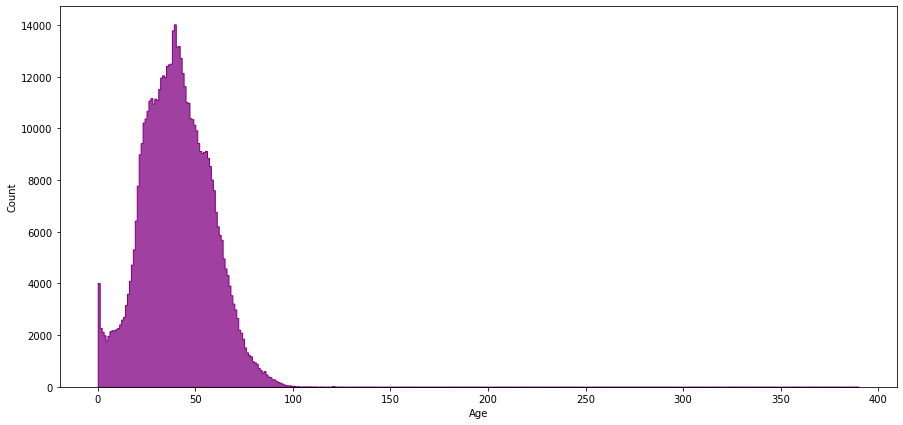

In [113]:
plt.figure(figsize = (15,7))
sns.histplot(data=df_1, x=df_1['Age'], y=None, hue=None, weights=None,
                 stat='count', bins=None, binwidth=1, binrange=None,
                 discrete=None, cumulative=False, common_bins=True, common_norm=True,
                 multiple='layer', element='step', fill=True, shrink=1, kde=False, kde_kws=None, 
                 line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None,
                 cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color= 'Purple', 
                 log_scale=None, legend=True, ax=None)
plt.show()

> There is an integrity issue in the age data

In [114]:
df_1.shape

(564905, 13)

In [115]:
df_1.drop(df_1[df_1.Age > 100].index, inplace=True)

In [116]:
df_1.shape

(564701, 13)

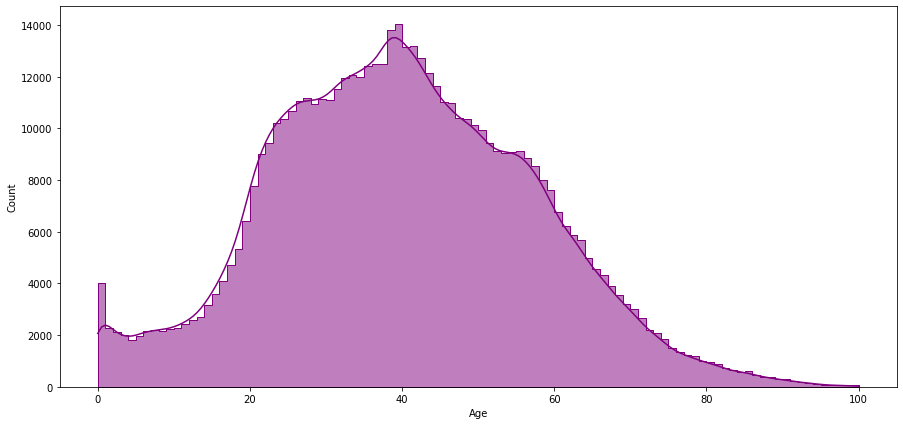

In [117]:
plt.figure(figsize = (15,7))
sns.histplot(data=df_1, x=df_1['Age'], y=None, hue=None, weights=None,
                 stat='count', bins=None, binwidth=1, binrange=None,
                 discrete=None, cumulative=False, common_bins=True, common_norm=True,
                 multiple='layer', element='step', fill=True, shrink=1, kde=True, kde_kws=None, 
                 line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None,
                 cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color= 'Purple', 
                 log_scale=None, legend=True, ax=None)
plt.show()

> **56%** of the initial data remains

##  Symptoms
> Creating symptom columns separated by symptom

In [118]:
listSymptomsUnique = []

SymptomsUnique = df_1['Symptoms'].unique()
for v in SymptomsUnique:
    string = v.split(',')
    for val in string:
        listSymptomsUnique.append(val)

listSymptomsUnique = set(listSymptomsUnique)    

In [119]:
listSymptomsUnique

{' Assintomático',
 ' Coriza',
 ' Dispneia',
 ' Distúrbios Gustativos',
 ' Distúrbios Olfativos',
 ' Dor de Cabeça',
 ' Dor de Garganta',
 ' Febre',
 ' Outros',
 ' Tosse',
 'Assintomático',
 'Coriza',
 'Dispneia',
 'Distúrbios Gustativos',
 'Distúrbios Olfativos',
 'Dor de Cabeça',
 'Dor de Garganta',
 'Febre',
 'Outros',
 'Tosse'}

In [120]:
# removing white spaces
new_listSymptomsUnique = []
for v in listSymptomsUnique:
    new_listSymptomsUnique.append(v.strip())
    
listSymptomsUnique = set(new_listSymptomsUnique)  

listSymptomsUnique

{'Assintomático',
 'Coriza',
 'Dispneia',
 'Distúrbios Gustativos',
 'Distúrbios Olfativos',
 'Dor de Cabeça',
 'Dor de Garganta',
 'Febre',
 'Outros',
 'Tosse'}

In [121]:
# creating the new columns
for val in listSymptomsUnique:
    list_Symptoms = []
    #val_split = val.split(',')
    for row in df_1['Symptoms']:
        if val in row:
            list_Symptoms.append(1)
        else:
            list_Symptoms.append(0)

     
    df_1[val] = list_Symptoms      

In [122]:
df_1.drop('Symptoms', axis=1, inplace=True)

In [123]:
pd.options.display.max_columns = None
df_1

,NotificationDate,StarSymptoms,Healthcare,Conditions,TestStatus,TestDate,TestType,Result,Sex,Counties,CountieNotification,Age,Assintomático,Distúrbios Gustativos,Tosse,Dispneia,Outros,Febre,Dor de Garganta,Distúrbios Olfativos,Dor de Cabeça,Coriza
0,2021-03-19,2021-03-18,Não,No Conditions,Concluído,2021-03-18,RT-PCR,Negativo,Masculino,Rio de Janeiro,Rio de Janeiro,13.0,0,0,0,0,0,0,1,0,1,1
1,2021-05-17,2021-04-20,Não,No Conditions,Concluído,2021-04-20,TESTE RÁPIDO - ANTÍGENO,Negativo,Feminino,Rio de Janeiro,Rio de Janeiro,53.0,0,0,0,0,0,1,0,0,0,0
2,2020-11-13,2020-11-12,Não,Imunossupressão,Concluído,2020-11-12,TESTE RÁPIDO - ANTICORPO,Positivo,Masculino,Rio de Janeiro,Rio de Janeiro,31.0,0,1,1,1,0,1,1,1,1,1
4,2021-05-17,2021-05-11,Não,No Conditions,Concluído,2021-05-11,RT-PCR,Negativo,Masculino,Macaé,Campos dos Goytacazes,32.0,1,0,0,0,0,0,0,0,0,0
5,2021-03-19,2021-03-15,Não,Doenças respiratórias crônicas descompensadas,Concluído,2021-03-15,RT-PCR,Negativo,Feminino,Rio de Janeiro,Rio de Janeiro,73.0,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999991,2021-06-11,2021-06-11,Não,No Conditions,Concluído,2021-06-11,TESTE RÁPIDO - ANTICORPO,Negativo,Feminino,Macaé,Macaé,24.0,1,0,0,0,0,0,0,0,0,0
999996,2021-03-25,2021-03-22,Não,No Conditions,Concluído,2021-03-22,RT-PCR,Negativo,Masculino,Araruama,Araruama,37.0,0,0,1,0,0,1,1,0,0,0
999997,2021-03-17,2021-03-07,Não,No Conditions,Concluído,2021-03-07,TESTE RÁPIDO - ANTICORPO,Negativo,Feminino,Magé,Magé,16.0,0,0,0,0,1,0,0,0,1,1
999998,2021-06-17,2021-06-14,Não,No Conditions,Concluído,2021-06-14,TESTE RÁPIDO - ANTÍGENO,Negativo,Feminino,Rio de Janeiro,Rio de Janeiro,32.0,0,0,0,0,1,0,0,0,0,0


##  Conditions
> Creating conditions columns separated by conditions

In [124]:
listConditionsUnique = []

ConditionsUnique = df_1['Conditions'].unique()
for v in ConditionsUnique:
    string = v.split(',')
    for val in string:
        listConditionsUnique.append(val)

listConditionsUnique = set(listConditionsUnique)    

In [125]:
listConditionsUnique

{' 4 ou 5)',
 ' Diabetes',
 ' Doenças cardíacas crônicas',
 ' Doenças renais crônicas em estágio avançado (graus 3',
 ' Doenças respiratórias crônicas descompensadas',
 ' Gestante',
 ' Gestante de alto risco',
 ' Imunossupressão',
 ' Obesidade',
 ' Portador de doenças cromossômicas ou estado de fragilidade imunológica',
 ' Puérpera (até 45 dias do parto)',
 'Diabetes',
 'Doenças cardíacas crônicas',
 'Doenças renais crônicas em estágio avançado (graus 3',
 'Doenças respiratórias crônicas descompensadas',
 'Gestante',
 'Gestante de alto risco',
 'Imunossupressão',
 'No Conditions',
 'Obesidade',
 'Portador de doenças cromossômicas ou estado de fragilidade imunológica',
 'Puérpera (até 45 dias do parto)'}

In [126]:
# removing white spaces
new_listConditionsUnique = []
for v in listConditionsUnique:
    new_listConditionsUnique.append(v.strip())
    
listConditionsUnique = set(new_listConditionsUnique)  

listConditionsUnique = list(listConditionsUnique)
listConditionsUnique

['Doenças renais crônicas em estágio avançado (graus 3',
 'No Conditions',
 'Portador de doenças cromossômicas ou estado de fragilidade imunológica',
 'Doenças respiratórias crônicas descompensadas',
 'Gestante de alto risco',
 'Diabetes',
 'Imunossupressão',
 'Puérpera (até 45 dias do parto)',
 'Gestante',
 'Obesidade',
 'Doenças cardíacas crônicas',
 '4 ou 5)']

In [127]:
listConditionsUnique.pop(2) # removing trash generated by processing

'Portador de doenças cromossômicas ou estado de fragilidade imunológica'

In [128]:
listConditionsUnique

['Doenças renais crônicas em estágio avançado (graus 3',
 'No Conditions',
 'Doenças respiratórias crônicas descompensadas',
 'Gestante de alto risco',
 'Diabetes',
 'Imunossupressão',
 'Puérpera (até 45 dias do parto)',
 'Gestante',
 'Obesidade',
 'Doenças cardíacas crônicas',
 '4 ou 5)']

In [129]:
# Creating the new columns
for val in listConditionsUnique:
    list_Conditions = []
    #val_split = val.split(',')
    for row in df_1['Conditions']:
        if val in row:
            list_Conditions.append(1)
        else:
            list_Conditions.append(0)

     
    df_1[val] = list_Conditions 

In [130]:
df_1.head()

,NotificationDate,StarSymptoms,Healthcare,Conditions,TestStatus,TestDate,TestType,Result,Sex,Counties,CountieNotification,Age,Assintomático,Distúrbios Gustativos,Tosse,Dispneia,Outros,Febre,Dor de Garganta,Distúrbios Olfativos,Dor de Cabeça,Coriza,Doenças renais crônicas em estágio avançado (graus 3,No Conditions,Doenças respiratórias crônicas descompensadas,Gestante de alto risco,Diabetes,Imunossupressão,Puérpera (até 45 dias do parto),Gestante,Obesidade,Doenças cardíacas crônicas,4 ou 5)
0,2021-03-19,2021-03-18,Não,No Conditions,Concluído,2021-03-18,RT-PCR,Negativo,Masculino,Rio de Janeiro,Rio de Janeiro,13.0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0
1,2021-05-17,2021-04-20,Não,No Conditions,Concluído,2021-04-20,TESTE RÁPIDO - ANTÍGENO,Negativo,Feminino,Rio de Janeiro,Rio de Janeiro,53.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2020-11-13,2020-11-12,Não,Imunossupressão,Concluído,2020-11-12,TESTE RÁPIDO - ANTICORPO,Positivo,Masculino,Rio de Janeiro,Rio de Janeiro,31.0,0,1,1,1,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0
4,2021-05-17,2021-05-11,Não,No Conditions,Concluído,2021-05-11,RT-PCR,Negativo,Masculino,Macaé,Campos dos Goytacazes,32.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,2021-03-19,2021-03-15,Não,Doenças respiratórias crônicas descompensadas,Concluído,2021-03-15,RT-PCR,Negativo,Feminino,Rio de Janeiro,Rio de Janeiro,73.0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0


# Altering Columns Values

In [131]:
df_2 = df_1.copy() # another checkpoint

In [132]:
df_names = ['NotificationDate','StarSymptoms','Healthcare','Conditions','TestStatus',
            'TestDate','TestType','Result','Sex', 'Counties','CountieNotification', 'Age',
            'Dyspnea', 'Cough', 'OlfactoryDisorders', 'GustatoryDisorders', 'SoreThroat', 'Fever', 
            'Other', 'Headache', 'Asymptomatic', 'Coryza', 'CarrierChromosomalDisordersORImmuneFragileState',
            'NoConditions', 'Obesity', 'ChronicKidneyDiseaseOverGrade3', 'Diabetes', 'DecompensatedChronicRespiratoryDisease',
            'Immunosuppression', 'HighRiskPregnantWoman', 'ChronicHeartDisease', 'PregnantWoman', 'PostpartumWoman']
df_2.columns = df_names

## Conditions

In [133]:
df_2.loc[df_2.Conditions != 'No Conditions', 'Conditions']='Conditions' 
# now conditions have a binary character (Conditions or No Conditions) 
# - the breakdown is done in the previously generated columns

In [134]:
df_2

,NotificationDate,StarSymptoms,Healthcare,Conditions,TestStatus,TestDate,TestType,Result,Sex,Counties,CountieNotification,Age,Dyspnea,Cough,OlfactoryDisorders,GustatoryDisorders,SoreThroat,Fever,Other,Headache,Asymptomatic,Coryza,CarrierChromosomalDisordersORImmuneFragileState,NoConditions,Obesity,ChronicKidneyDiseaseOverGrade3,Diabetes,DecompensatedChronicRespiratoryDisease,Immunosuppression,HighRiskPregnantWoman,ChronicHeartDisease,PregnantWoman,PostpartumWoman
0,2021-03-19,2021-03-18,Não,No Conditions,Concluído,2021-03-18,RT-PCR,Negativo,Masculino,Rio de Janeiro,Rio de Janeiro,13.0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0
1,2021-05-17,2021-04-20,Não,No Conditions,Concluído,2021-04-20,TESTE RÁPIDO - ANTÍGENO,Negativo,Feminino,Rio de Janeiro,Rio de Janeiro,53.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2020-11-13,2020-11-12,Não,Conditions,Concluído,2020-11-12,TESTE RÁPIDO - ANTICORPO,Positivo,Masculino,Rio de Janeiro,Rio de Janeiro,31.0,0,1,1,1,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0
4,2021-05-17,2021-05-11,Não,No Conditions,Concluído,2021-05-11,RT-PCR,Negativo,Masculino,Macaé,Campos dos Goytacazes,32.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,2021-03-19,2021-03-15,Não,Conditions,Concluído,2021-03-15,RT-PCR,Negativo,Feminino,Rio de Janeiro,Rio de Janeiro,73.0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999991,2021-06-11,2021-06-11,Não,No Conditions,Concluído,2021-06-11,TESTE RÁPIDO - ANTICORPO,Negativo,Feminino,Macaé,Macaé,24.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
999996,2021-03-25,2021-03-22,Não,No Conditions,Concluído,2021-03-22,RT-PCR,Negativo,Masculino,Araruama,Araruama,37.0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
999997,2021-03-17,2021-03-07,Não,No Conditions,Concluído,2021-03-07,TESTE RÁPIDO - ANTICORPO,Negativo,Feminino,Magé,Magé,16.0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
999998,2021-06-17,2021-06-14,Não,No Conditions,Concluído,2021-06-14,TESTE RÁPIDO - ANTÍGENO,Negativo,Feminino,Rio de Janeiro,Rio de Janeiro,32.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Healthcare

In [135]:
df_2.loc[df_2.Healthcare == 'Não', 'Healthcare']='No'
df_2.loc[df_2.Healthcare == 'Sim', 'Healthcare']='Yes'

In [136]:
df_2.Healthcare.unique()

array(['No', 'Yes'], dtype=object)

## TestStatus

In [137]:
df_2.loc[df_2.TestStatus == 'Concluído', 'TestStatus']='Completed'
df_2.loc[df_2.TestStatus == 'Exame Não Solicitado', 'TestStatus']='Not Requested'

In [138]:
df_2.TestStatus.unique()

array(['Completed', 'Not Requested'], dtype=object)

## TestType

In [139]:
df_2.loc[df_2.TestType == 'TESTE RÁPIDO - ANTÍGENO', 'TestType']='Antigen'
df_2.loc[df_2.TestType == 'TESTE RÁPIDO - ANTICORPO', 'TestType']='Antibody'
df_2.loc[df_2.TestType == 'Enzimaimunoensaio - ELISA IgM', 'TestType']='IgM ELISA'
df_2.loc[df_2.TestType == 'Imunoensaio por Eletroquimioluminescência - ECLIA IgG', 'TestType']='ECLIA IgG'
df_2.loc[df_2.TestType == 'Quimioluminescência - CLIA', 'TestType']='CLIA'
df_2.loc[df_2.TestType == 'Imunoensaio por Eletroquimioluminescência \x13 ECLIA', 'TestType']='ECLIA'
df_2.loc[df_2.TestType == 'Enzimaimunoensaio \x13 ELISA', 'TestType']='ELISA'

In [140]:
df_2.TestType.unique()

array(['RT-PCR', 'Antigen', 'Antibody', 'IgM ELISA', 'ECLIA IgG', 'CLIA',
       'ECLIA', 'ELISA'], dtype=object)

## Result

In [141]:
df_2.loc[df_2.Result == 'Negativo', 'Result']='Negative'
df_2.loc[df_2.Result == 'Positivo', 'Result']='Positive'
df_2.loc[df_2.Result == 'Inconclusivo ou Indeterminado', 'Result']='Inconclusive'

In [142]:
df_2.Result.unique()

array(['Negative', 'Positive', 'Inconclusive'], dtype=object)

## Sex

In [143]:
df_2.loc[df_2.Sex == 'Masculino', 'Sex']='Woman'
df_2.loc[df_2.Sex == 'Feminino', 'Sex']='Man'

In [144]:
df_2.Sex.unique()

array(['Woman', 'Man'], dtype=object)

In [145]:
df_2

,NotificationDate,StarSymptoms,Healthcare,Conditions,TestStatus,TestDate,TestType,Result,Sex,Counties,CountieNotification,Age,Dyspnea,Cough,OlfactoryDisorders,GustatoryDisorders,SoreThroat,Fever,Other,Headache,Asymptomatic,Coryza,CarrierChromosomalDisordersORImmuneFragileState,NoConditions,Obesity,ChronicKidneyDiseaseOverGrade3,Diabetes,DecompensatedChronicRespiratoryDisease,Immunosuppression,HighRiskPregnantWoman,ChronicHeartDisease,PregnantWoman,PostpartumWoman
0,2021-03-19,2021-03-18,No,No Conditions,Completed,2021-03-18,RT-PCR,Negative,Woman,Rio de Janeiro,Rio de Janeiro,13.0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0
1,2021-05-17,2021-04-20,No,No Conditions,Completed,2021-04-20,Antigen,Negative,Man,Rio de Janeiro,Rio de Janeiro,53.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2020-11-13,2020-11-12,No,Conditions,Completed,2020-11-12,Antibody,Positive,Woman,Rio de Janeiro,Rio de Janeiro,31.0,0,1,1,1,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0
4,2021-05-17,2021-05-11,No,No Conditions,Completed,2021-05-11,RT-PCR,Negative,Woman,Macaé,Campos dos Goytacazes,32.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,2021-03-19,2021-03-15,No,Conditions,Completed,2021-03-15,RT-PCR,Negative,Man,Rio de Janeiro,Rio de Janeiro,73.0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999991,2021-06-11,2021-06-11,No,No Conditions,Completed,2021-06-11,Antibody,Negative,Man,Macaé,Macaé,24.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
999996,2021-03-25,2021-03-22,No,No Conditions,Completed,2021-03-22,RT-PCR,Negative,Woman,Araruama,Araruama,37.0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
999997,2021-03-17,2021-03-07,No,No Conditions,Completed,2021-03-07,Antibody,Negative,Man,Magé,Magé,16.0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
999998,2021-06-17,2021-06-14,No,No Conditions,Completed,2021-06-14,Antigen,Negative,Man,Rio de Janeiro,Rio de Janeiro,32.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# Final look upon

In [146]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564701 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   NotificationDate                                 564701 non-null  datetime64[ns]
 1   StarSymptoms                                     564701 non-null  datetime64[ns]
 2   Healthcare                                       564701 non-null  object        
 3   Conditions                                       564701 non-null  object        
 4   TestStatus                                       564701 non-null  object        
 5   TestDate                                         564701 non-null  datetime64[ns]
 6   TestType                                         564701 non-null  object        
 7   Result                                           564701 non-null  object        
 8   Sex                     

In [147]:
df_2['Age'] = df_2.Age.astype(int)

# Exporting csv file

In [297]:
df_2.to_csv(r'DataSUS_PreProcessed.csv', index=False)